## Import all the necessary libraries
<hr/>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

%pylab inline

import os
from scipy.misc import imread
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from __future__ import print_function
from keras.datasets import mnist

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import keras

from keras.models import Sequential    # Importing Sequential Model
from keras.layers.core import Dense,Dropout, Activation  #  Importing  Dense Layers,Dropouts and Activation functions
from keras.optimizers import RMSprop, Adam
from keras.utils import np_utils  
np.random.seed(1671) # for reproducibility -> Once you put the same seed you get same patterns of random numbers.




# Any results you write to the current directory are saved as output.

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


### Load Train and Test Data:

In [2]:
root_dir = os.path.abspath('../..')

# check for existence
print(os.path.exists(root_dir))
print(root_dir)

data_dir = os.path.join(root_dir,'Analytics_Vidhya_ML_Projects','Identify the Digits')
print(os.path.exists(data_dir))
print(data_dir)

sub_dir = os.path.join(data_dir,'sub') 
print(os.path.exists(sub_dir))
print(sub_dir)

True
C:\Users\Dinesh\Desktop
True
C:\Users\Dinesh\Desktop\Analytics_Vidhya_ML_Projects\Identify the Digits
True
C:\Users\Dinesh\Desktop\Analytics_Vidhya_ML_Projects\Identify the Digits\sub


In [3]:

# To stop potential randomness
seed = 128
rng = np.random.RandomState(seed)

In [4]:
train = pd.read_csv(os.path.join(data_dir,'data','Train', 'train.csv')) # filename,labels
train.head(n=5)

,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3


In [5]:
test = pd.read_csv(os.path.join('test.csv')) # filename
test.head(n=5)

,filename
0,49000.png
1,49001.png
2,49002.png
3,49003.png
4,49004.png


In [6]:
sample_submission = pd.read_csv(os.path.join('Sample_Submission.csv')) # sample submission file

#### Let us see what our data looks like! We read our image and display it.

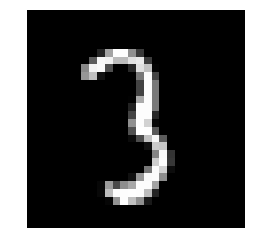

In [7]:
img_name = rng.choice(train.filename)
filepath = os.path.join(data_dir,'data', 'Train', 'Images', 'train', img_name)

img = imread(filepath, flatten=True)

pylab.imshow(img, cmap='gray')
pylab.axis('off')
pylab.show()


#### For easier data manipulation, let’s store all our images as numpy arrays

In [8]:

temp = []
for img_name in train.filename:
    image_path = os.path.join(data_dir,'data',  'Train', 'Images', 'train', img_name)
    img = imread(image_path, flatten=True)
    img = img.astype('float32')
    temp.append(img)
    
train_x = np.stack(temp)

train_x /= 255.0 
train_x = train_x.reshape(-1, 784).astype('float32')

temp = []
for img_name in test.filename:
    image_path = os.path.join(data_dir,'data',  'Train', 'Images', 'test', img_name)
    img = imread(image_path, flatten=True)
    img = img.astype('float32')
    temp.append(img)
    
test_x = np.stack(temp)

test_x /= 255.0
test_x = test_x.reshape(-1, 784).astype('float32')

### One Hot encoding of labels.
A one-hot vector is a vector which is 0 in most dimensions, and 1 in a single dimension. In this case, the nth digit will be represented as a vector which is 1 in the nth dimension.

Labels are 10 digits numbers from 0 to 9. We need to encode these lables to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0]).

In [9]:
import keras
#  Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])

train_y = keras.utils.np_utils.to_categorical(train.label.values) #labels

In [10]:
print("Training Images Shape:",train_x.shape) # Training Images Dimensions

Training Images Shape: (49000, 784)


In [11]:
print("Training Labels dimension:",train_y.shape) # Training Labels Dimensions

Training Labels dimension: (49000, 10)


In [12]:
print("Testing Images Shape:",test_x.shape) # Testing Images Dimensions

Testing Images Shape: (21000, 784)


### Defining Network and Training:

In [13]:
# network and training
NB_EPOCH = 30 # 30-> times the model is exposed to the training set.
BATCH_SIZE = 300
VERBOSE = 1
NB_CLASSES = 10 # number of outputs = number of digits
OPTIMIZER = Adam()
N_HIDDEN = 128 # Neurons
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
DROPOUT = 0.3

### Designing Neural Network Architecture:

In [14]:
# Final hidden layer  with 10 outputs
# final stage is softmax
model = Sequential() # Sequential Model.
model.add(Dense(N_HIDDEN, input_shape=(784,))) # 1st Hidden Layer --> 128 neurons and input dimension ->784
model.add(Activation('relu')) # Activation function for 1st Hidden Layer
model.add(Dropout(DROPOUT))

model.add(Dense(N_HIDDEN))  # 2nd Hidden Layer --> 128 neurons
model.add(Activation('relu')) # Activation function for 2nd Hidden Layer
model.add(Dropout(DROPOUT))


model.add(Dense(NB_CLASSES)) # Final layer with 10 neurons == > no of outputs
model.add(Activation('softmax')) # Final layer activation will be 'softmax'

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
__________

### Compile network
Before making network ready for training we have to make sure to add below things:

1. A loss function: to measure how good the network is

2. An optimizer: to update network as it sees more data and reduce loss value

3. Metrics: to monitor performance of network

In [15]:
# Compiling a model in keras
model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])

### Train a model in keras:

In [16]:
# Training a model in keras

# Once the model is compiled it can be trained with the fit() function

history = model.fit(train_x, train_y,
batch_size=BATCH_SIZE, epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Train on 39200 samples, validate on 9800 samples
Epoch 1/30
39200/39200 [==============================] - 2s 51us/step - loss: 0.7364 - acc: 0.7744 - val_loss: 0.2774 - val_acc: 0.9199
Epoch 2/30
39200/39200 [==============================] - 2s 39us/step - loss: 0.3051 - acc: 0.9090 - val_loss: 0.2001 - val_acc: 0.9404
Epoch 3/30
39200/39200 [==============================] - 2s 39us/step - loss: 0.2307 - acc: 0.9303 - val_loss: 0.1596 - val_acc: 0.9501
Epoch 4/30
39200/39200 [==============================] - 2s 41us/step - loss: 0.1905 - acc: 0.9435 - val_loss: 0.1342 - val_acc: 0.9587
Epoch 5/30
39200/39200 [==============================] - 2s 40us/step - loss: 0.1650 - acc: 0.9501 - val_loss: 0.1218 - val_acc: 0.9620
Epoch 6/30
39200/39200 [==============================] - 2s 39us/step - loss: 0.1474 - acc: 0.9556 - val_loss: 0.1118 - val_acc: 0.9647
Epoch 7/30
39200/39200 [==============================] - 2s 42us/step - loss: 0.1328 - acc: 0.9595 - val_loss: 0.1073 - val_acc:

In [17]:
pred = model.predict_classes(test_x)

21000/21000 [==============================] - 1s 33us/step


Prediction is:  9


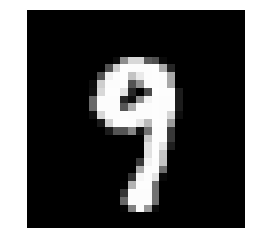

In [18]:

img_name = rng.choice(test.filename)
filepath = os.path.join(data_dir,'data', 'Train', 'Images', 'test', img_name)

img = imread(filepath, flatten=True)

test_index = int(img_name.split('.')[0]) - train.shape[0]

print("Prediction is: ", pred[test_index])

pylab.imshow(img, cmap='gray')
pylab.axis('off')
pylab.show()

In [20]:
sample_submission.filename = test.filename; sample_submission.label = pred
sample_submission.to_csv(os.path.join(sub_dir, 'sub02.csv'), index=False)